In [28]:
from google.colab import drive
# Importar la librería Pandas
import pandas as pd
# Importamos el contador de vectorización e inicializarlo
from sklearn.feature_extraction.text import CountVectorizer
from wordcloud import WordCloud
import matplotlib.pyplot as plt
# Mostramos la nube de palabras
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

In [2]:
# Montar Drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
# 2. Definir ruta de la carpeta en Drive
ruta_carpeta = "/content/drive/MyDrive/_IABD/_proyectos_python/mia/ud4_PLN/practicas/practicas3_1_spam/"

In [4]:
!ls "/content/drive/MyDrive/_IABD/_proyectos_python/mia/ud4_PLN/practicas/3_1_spam/"

'PLN - P3.1 _ Creación de un filtro de spam.pdf'   practica3_1_spam.ipynb   SMSSpamCollection.txt


In [5]:
ruta_archivo_sms = "/content/drive/MyDrive/_IABD/_proyectos_python/mia/ud4_PLN/practicas/3_1_spam/SMSSpamCollection.txt"

In [6]:
df = pd.read_csv(ruta_archivo_sms, sep="\t", header=None, names=["label", "sms_message"])

In [7]:
# Visualización de las 5 primeras filas
df.head()

,label,sms_message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [8]:
# Conversión
df['label'] = df.label.map({'ham':0, 'spam':1})

In [9]:
# Visualizar las dimensiones de los datos
df.shape

(5572, 2)

In [11]:
# Definimos los documentos
documents = ['Hello, how are you!',
             'Win money, win from home.',
             'Call me now.',
             'Hello, Call hello you tomorrow?']

In [12]:
count_vector = CountVectorizer()

In [13]:
# Visualizamos del objeto'count_vector' que es una instancia de 'CountVectorizer()'
print(count_vector)

CountVectorizer()


In [14]:
count_vector.fit(documents)
names = count_vector.get_feature_names_out()
names

array(['are', 'call', 'from', 'hello', 'home', 'how', 'me', 'money',
       'now', 'tomorrow', 'win', 'you'], dtype=object)

In [15]:
doc_array = count_vector.transform(documents).toarray()
doc_array

array([[1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1],
       [0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 2, 0],
       [0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0],
       [0, 1, 0, 2, 0, 0, 0, 0, 0, 1, 0, 1]])

In [16]:
frequency_matrix = pd.DataFrame(data=doc_array, columns=names)
frequency_matrix

,are,call,from,hello,home,how,me,money,now,tomorrow,win,you
0,1,0,0,1,0,1,0,0,0,0,0,1
1,0,0,1,0,1,0,0,1,0,0,2,0
2,0,1,0,0,0,0,1,0,1,0,0,0
3,0,1,0,2,0,0,0,0,0,1,0,1


In [21]:
# Creamos una lista con las palabras que se consideran ‘spam’
spam_words = ' '.join(list(df[df['label'] == 1]['sms_message']))

# Generamos la nube de palabras
spam_wc = WordCloud(width=600, height=512, background_color='grey').generate(spam_words)


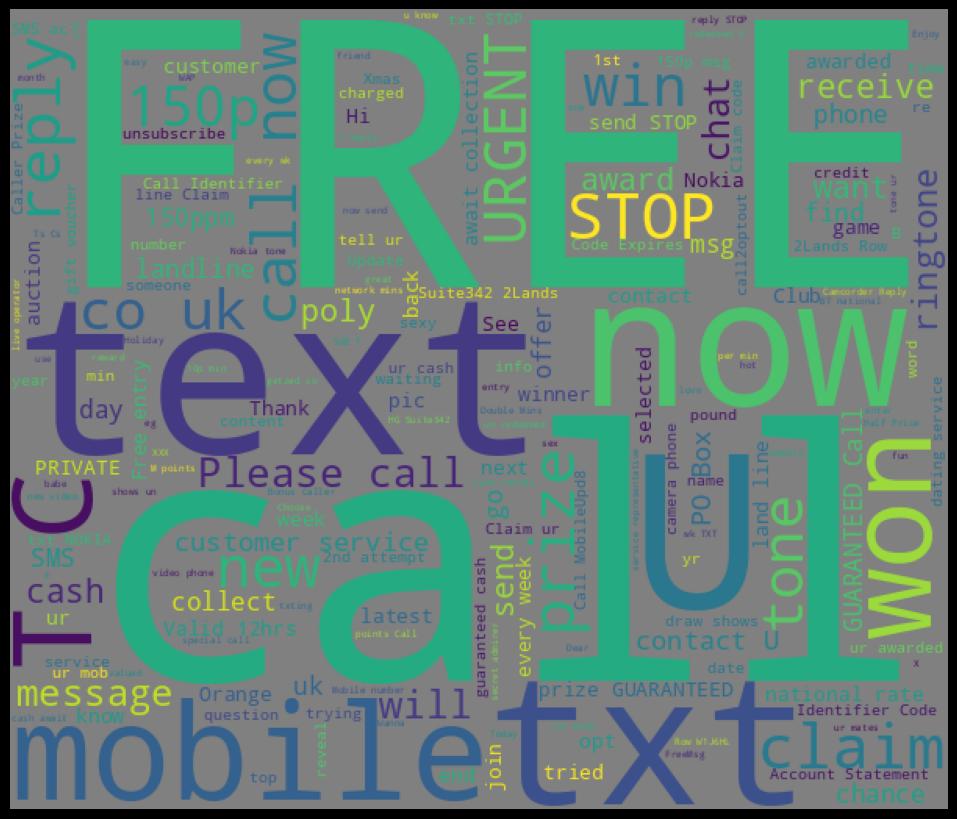

In [22]:
# Representamos la nube de palabras
plt.figure(figsize = (12, 8), facecolor = 'k')
plt.imshow(spam_wc)
plt.axis('off')
plt.tight_layout(pad = 0)
plt.show()

In [24]:
# Dividimos los datos en dos partes: entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(df['sms_message'], df['label'],
random_state=1)
print('Number of rows in the total set: {}'.format(df.shape[0]))
print('Number of rows in the training set: {}'.format(X_train.shape[0]))
print('Number of rows in the test set: {}'.format(X_test.shape[0]))

Number of rows in the total set: 5572
Number of rows in the training set: 4179
Number of rows in the test set: 1393


In [25]:
# Creamos un objeto CountVectorizer
count_vector = CountVectorizer()

In [26]:
# Generamos la matriz que a partir de los datos de entrenamiento
training_data = count_vector.fit_transform(X_train)

In [27]:
# Transformamos los datos de prueba y devolvemos la matriz (sin generar el diccionario de características)
testing_data = count_vector.transform(X_test)

In [29]:
naive_bayes = MultinomialNB()
naive_bayes.fit(training_data, y_train)

MultinomialNB()

In [30]:
predictions = naive_bayes.predict(testing_data)

In [31]:
print('Accuracy score: ', format(accuracy_score(y_test, predictions)))
print('Precision score: ', format(precision_score(y_test, predictions)))
print('Recall score: ', format(recall_score(y_test, predictions)))
print('F1 score: ', format(f1_score(y_test, predictions)))

Accuracy score:  0.9885139985642498
Precision score:  0.9720670391061452
Recall score:  0.9405405405405406
F1 score:  0.9560439560439561
